In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

Consider a minimum-effort coordination game between $N=2$ players drawn from a population of agents. Each player $i$ has two actions: either exert high effort or exert low effort, $a_i∈\{H,L\}$. The high effort benefits players only if every player chooses the high-effort. If any player chooses the low-effort, then all players receive only the benefit from the low effort. Thus the payoffs are: $$p(a_i;a_{-i})=1+min_{j∈{1,…,n}}⁡ a_j-ca_i$$

# Part 1: Preliminaries

In [2]:
# CRRA utility function
def CRRA(x,gamma): #can use offset by xMin in case of negative values of x
    if gamma == 1:
        return np.log(x)
    else:
        return ((x)**(1-gamma) - 1)/(1-gamma)

In [3]:
# Calculate expected utility of action a given other players' mixing prob.
# Notice that I'm assuming each one has two actions available. 
def Utility(sij, pOther,cost,gamma):
    n=len(pOther)
    pH=pOther[1]**n #Probability that all other play H
    u = pH*CRRA(1+min(sij, 1) - cost*sij,gamma) + \
        (1-pH)* CRRA(1+min(sij, 0) - cost*sij,gamma) #Add
    return u

## Part 2: Compute QRE

Assumptions:
    * Two agents
    * Two actions
    * Symmetry
    * Minimizer constraints

In [4]:
#Define the function whose 0 we want to find
def F(p, l = 1,cost=.5,gamma=0): ## probability vector and value of lambda
    #with only two pure strategies use H=1 as the reference strategy
    H=p[0] - p[1] - l*(Utility(0,np.exp(p),cost,gamma) - Utility(1,np.exp(p),cost,gamma))
    res = np.transpose(H)*(H)
    return res

In [5]:
cons = ({'type': 'eq', 'fun' : lambda p: np.exp(p[0]) + np.exp(p[1]) - 1})

In [6]:
cost=.5
gamma=.5
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),2))
p0 = np.log([0.5,0.5])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,gamma,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] = np.exp(res.x)

C:\Users\xinxi\AppData\Local\Temp/ipykernel_16536/193906246.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['$p_L$','$p_H$'], loc = 0)


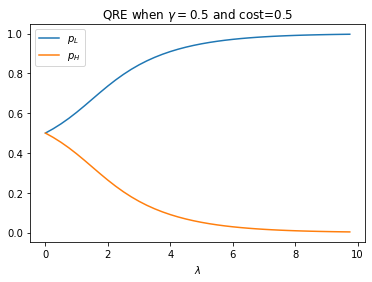

In [7]:
#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['$p_L$','$p_H$'], loc = 0)
ax.set_title("QRE when $\gamma = %1.1f$ and cost=%1.1f"%(gamma,cost))
plt.show()